In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load dataset (modify the filename if needed)
df = pd.read_csv(r"C:\Users\91739\Downloads\spam (2).csv", encoding="latin-1")

# Display first 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Check basic info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64

In [9]:
# Rename columns if needed (modify based on your dataset)
df = df.iloc[:, :2]  # Keeping only first two columns
df.columns = ["label", "message"]

# Convert labels into binary values (spam = 1, ham = 0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Display dataset after cleaning
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


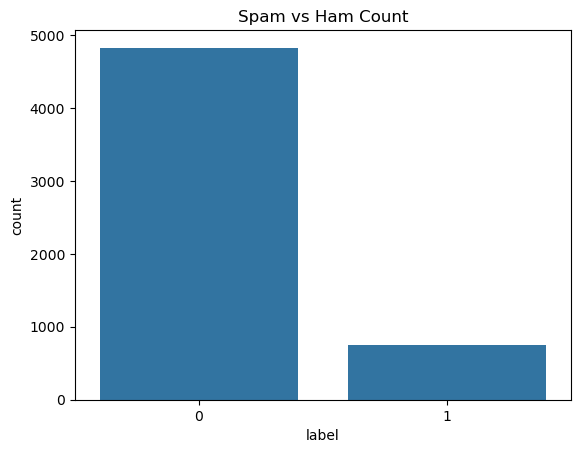

In [11]:
# Countplot of labels
sns.countplot(x=df["label"])
plt.title("Spam vs Ham Count")
plt.show()

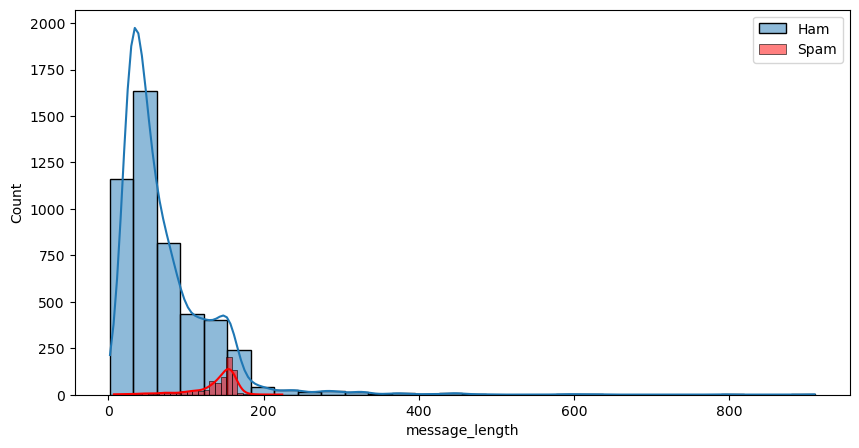

In [13]:
# Check the length of messages
df["message_length"] = df["message"].apply(len)

# Plot distribution of message lengths
plt.figure(figsize=(10,5))
sns.histplot(df[df["label"] == 0]["message_length"], bins=30, kde=True, label="Ham")
sns.histplot(df[df["label"] == 1]["message_length"], bins=30, kde=True, color="red", label="Spam")
plt.legend()
plt.show()

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)

df["cleaned_message"] = df["message"].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,message,message_length,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_message"])

# Labels
y = df["label"]

# Splitting dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (4457, 9455)
Shape of X_test: (1115, 9455)


In [19]:
# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



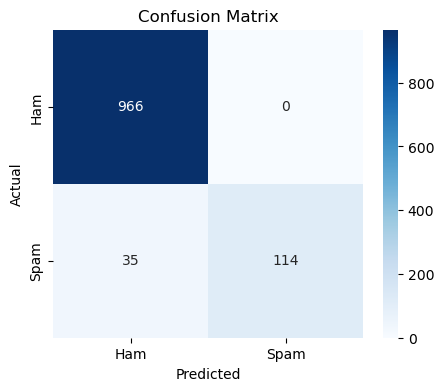

In [21]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
def predict_message():
    user_input = input("Enter a message: ")
    cleaned_text = clean_text(user_input)  # Preprocess text
    vectorized_text = vectorizer.transform([cleaned_text])  # Convert to TF-IDF
    prediction = model.predict(vectorized_text)[0]  # Predict
    
    if prediction == 1:
        print("🚨 Spam Detected!")
    else:
        print("✅ It's a Ham (Not Spam).")

# Run the function for user input
predict_message()

Enter a message:  hi


✅ It's a Ham (Not Spam).
